In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [5]:
model_path = 'models/batch100-epochs200-lstm2x32.model'
model = keras.models.load_model(model_path)
batch_size = 100
lookback = 8

In [6]:
# TODO: get data params from model_path
from data_loader import Data
data = Data(lookback=lookback, batch_size=batch_size)

In [7]:
# model.evaluate(x=data.test.features, y=data.test.vasopressin)
model.evaluate(x=data.validate.features, y=data.validate.vasopressin, batch_size=batch_size)

62800/62800 [==============================] - 2s 34us/step

4.762727662457517e-06

In [14]:
# preds = model.predict(data.test.features[:100], batch_size=batch_size)
preds = model.predict(data.validate.features[:100], batch_size=batch_size)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

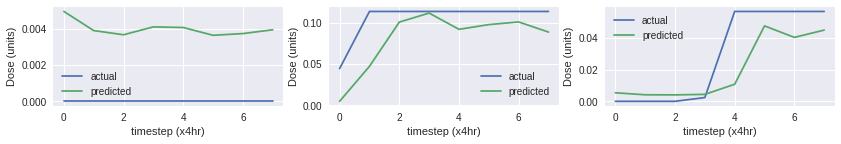

In [24]:
f, ax = plt.subplots(2, 3, figsize=(14, 4))

for n, i in enumerate(range(6)):
    # d = data.test.vasopressin[i]
    d = data.validate.vasopressin[i]
    x = range(len(d))
    ax = plt.subplot(2, 3, n + 1)
    ax.plot(d, label='actual')
    ax.plot(preds[i][:len(d)], label='predicted')
    ax.set_xlabel('timestep (x4hr)')
    ax.set_ylabel('Dose (units)')
    # plt.xlim([0, np.array(np.where(d==-1)).min() -6])
    ax.legend()

f.savefig('figures/predicted_vasopressin.png', dpi=200, )

# History

In [ ]:
import pickle